<a href="https://colab.research.google.com/github/almareshe/Simulacion-2/blob/main/MC_hitormiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo de Monte Carlo para aproximar integrales**

Obtenemos la grafica de estabilidad que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def integracionmc(func, exps, a, b, c):
    hits = 0
    area = []
    for exp in range(1, exps + 1):
        u_1 = np.random.uniform(a, b)
        u_2 = np.random.uniform(0, c)
        evaluacion = func(u_1)

        if evaluacion > u_2:
            hits += 1
        estimacion = c * (a - b) * hits / exp
        area.append(estimacion)
    return area

Realizamos los experimentos con la funcion dada y  graficamos

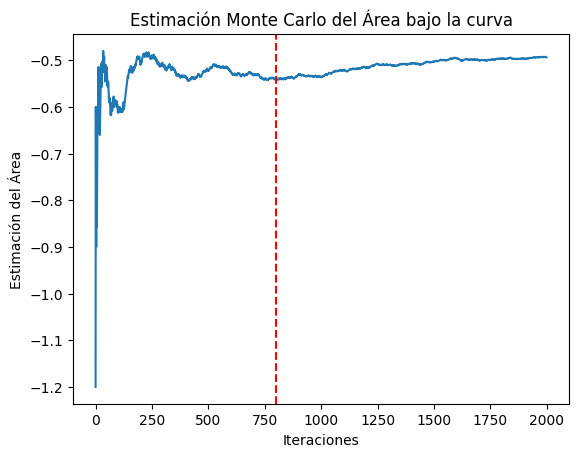

In [ ]:
#Definimos la funcion que usaremos
def fun(u):
    return (u**(-3) - u**(-2)) * ((1 + (1/u - 1)**2)**(-2))
resultados = integracionmc(fun, 2000, 0, 1, 1.2) #Aquí se ingresan los valores del limite superior: a, inferior: b, y c

# Visualización de los resultados
plt.plot(resultados)
plt.xlabel('Iteraciones')
plt.ylabel('Estimación del Área')
plt.title('Estimación Monte Carlo del Área bajo la curva')
plt.axvline(x=800, color='red', linestyle='--')
plt.show()

Ahora replicamos el modelo

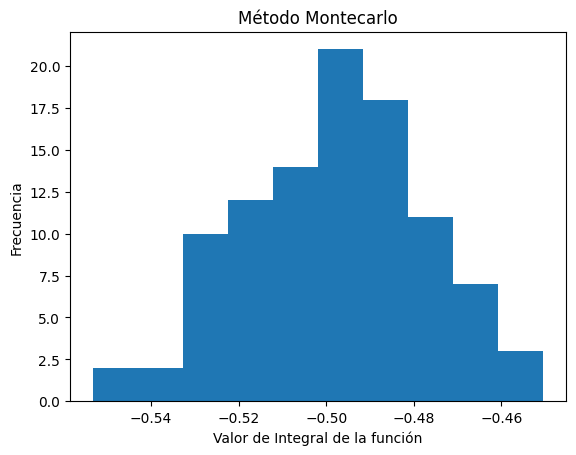

In [ ]:
def simularmc(reps):
    return [np.mean(integracionmc(fun, 2000, 0, 1, 1.2)) for _ in range(reps)]

nexp = 100
simulacion = simularmc(nexp)

plt.hist(simulacion)
plt.xlabel('Valor de Integral de la función')
plt.ylabel('Frecuencia')
plt.title('Método Montecarlo')
plt.show()

Calculamos la media, la varianza y la desviacion

In [ ]:
med = np.mean(simulacion)
var = np.var(simulacion)
desv = np.std(simulacion)
print(med,var,desv)

-0.49633824406397303 0.00038054649677040546 0.019507600999877084


Encontramos el intervalo de confianza con un nivel del 95%

In [ ]:
import scipy.stats as stats
import math

# Definir los parámetros
confianza = 0.95
media = med
N = 100      # tamaño de la muestra

# Calcular el valor crítico Z
z_alpha_2 = stats.norm.ppf(1 - (1 - confianza) / 2)

# Calcular los límites del intervalo de confianza
l_inferior = media - z_alpha_2 * (desv / math.sqrt(N))
l_superior = media + z_alpha_2 * (desv / math.sqrt(N))

# Imprimir los resultados
print(f"Intervalo de confianza al {confianza*100}% para la media poblacional:")
print(f"    {l_inferior} < μ < {l_superior}")


Intervalo de confianza al 95.0% para la media poblacional:
    -0.5001616636024266 < μ < -0.49251482452551937
